In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df = pd.read_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/clustering_result(0_1_sales_reduced).pkl')

In [ ]:
df

,CUSTNO,AGEGROUP,GENDER,PURCHAMOUNT,FREQUENCY,RESIDENCE,ONLINE,USE_COMP,MEMBERSHIP,labels
0,1,9,0,9336600,43,60,0,1,0,0
1,4,9,1,1961650,18,16,0,1,0,0
2,8,9,0,566800,8,10,0,1,0,0
3,9,9,1,28180290,102,100,0,0,0,0
4,13,9,1,136300,2,210,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9519,19361,6,1,491900,6,100,0,0,1,1
9520,19364,2,1,253600,1,210,0,0,1,1
9521,19371,7,1,148000,1,52,0,0,1,3
9522,19372,4,1,4962200,41,100,0,1,0,4


In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_features=df.drop(['labels','CUSTNO'],axis=1)
y_labels=df['labels']

dt_clf=DecisionTreeClassifier(min_samples_leaf= 10,max_features=8,max_depth=10,max_leaf_nodes=10)
dt_clf.fit(X_features,y_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=8, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

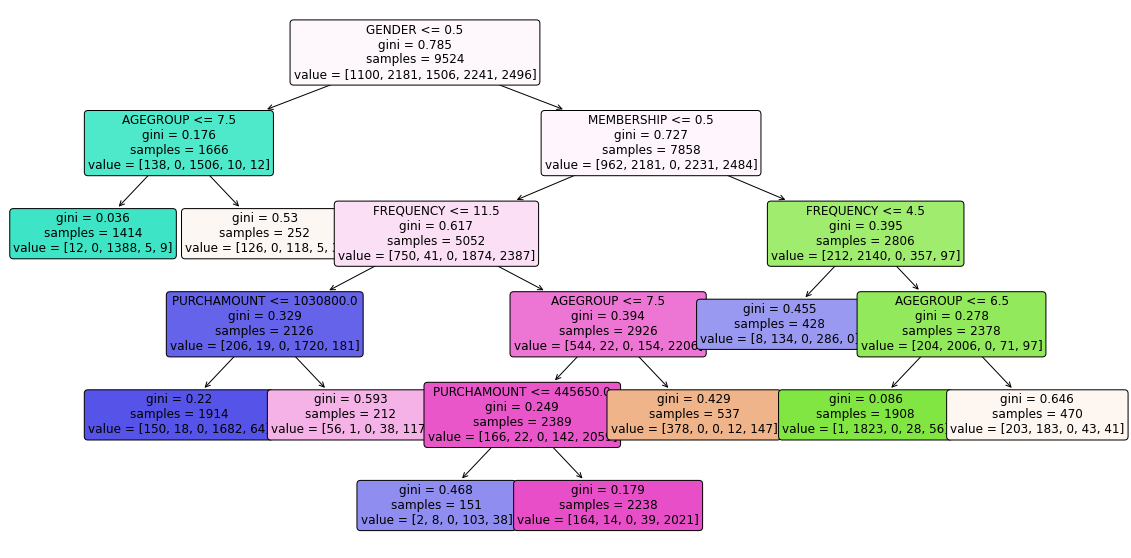

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_clf, filled=True,\
              feature_names=X_features.columns,rounded=True,fontsize=12)
plt.show()
plt.close()

In [ ]:
fds=pd.read_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/final_data_set.pkl')
fds.drop('spent_less_x',axis=1,inplace=True)
fds=fds[fds.spent_less==0]

edf=df[['CUSTNO','labels']]
edf

mdf=pd.merge(fds,edf,how='left',on='CUSTNO')
mdf

,CUSTNO,RECEIPTNO,PURCHDATE,PURCHTIME,AFFIL,CLASSCODEL,CLASSCODEM,CLASSCODES,STORENO,GENDER,AGEGROUP,RESIDENCE,PURCHAMOUNT,Year,AFFIL_CLASS,AFFIL_CLASS_2,cloth_cat,hobby_cat,14purchase,15purchase,spent_less,labels
0,1,02857006,2014-10-05,17,A,5,0506,A050601,012,M,60세이상,060,342400,2014,A5,A0506,cloth_men,uncategorized,342400,0,0,0
1,1,02857007,2014-10-05,17,A,5,0506,A050601,012,M,60세이상,060,78000,2014,A5,A0506,cloth_men,uncategorized,78000,0,0,0
2,1,02857020,2014-10-05,17,A,5,0501,A050113,012,M,60세이상,060,500000,2014,A5,A0501,cloth_men,uncategorized,500000,0,0,0
3,1,02947490,2014-10-19,12,A,4,0402,A040222,012,M,60세이상,060,314640,2014,A4,A0402,cloth_casual,uncategorized,314640,0,0,0
4,1,02947512,2014-10-19,13,A,5,0503,A050306,012,M,60세이상,060,406980,2014,A5,A0503,cloth_etc,uncategorized,406980,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185981,19373,02959987,2014-10-22,17,A,4,0402,A040233,010,F,25세~29세,100,69000,2014,A4,A0402,cloth_casual,uncategorized,69000,0,0,1
185982,19373,02959943,2014-10-22,17,A,4,0406,A040602,010,F,25세~29세,100,17000,2014,A4,A0406,cloth_lingerie,uncategorized,17000,0,0,1
185983,19373,02844688,2014-10-03,20,A,4,0402,A040228,042,F,25세~29세,100,69000,2014,A4,A0402,cloth_casual,uncategorized,69000,0,0,1
185984,19373,05366898,2015-10-25,14,A,4,0402,A040217,010,F,25세~29세,100,29000,2015,A4,A0402,cloth_casual,uncategorized,0,29000,0,1


In [ ]:
def get_mdfy(label):
  emdf=mdf[mdf.labels==label]
  mdf14=emdf[mdf.Year==2014][['CUSTNO','PURCHAMOUNT']]
  mdf15=emdf[mdf.Year==2015][['CUSTNO','PURCHAMOUNT']]
  gmdf14=mdf14.groupby('CUSTNO').sum()
  gmdf15=mdf15.groupby('CUSTNO').sum()
  mgmdf=pd.merge(gmdf14,gmdf15,how='left',on='CUSTNO')
  mgmdf['PURCHAMOUNT_y'].fillna(0,inplace=True)
  mgmdf['PURCHAMOUNT_diff']=mgmdf['PURCHAMOUNT_y']-mgmdf['PURCHAMOUNT_x']
  mgmdf.drop(['PURCHAMOUNT_x','PURCHAMOUNT_y'],axis=1,inplace=True)
  mgmdf.reset_index(inplace=True)
  print(str(label)+' cluster\'s reduced purchase : '+str(mgmdf['PURCHAMOUNT_diff'].mean()))

In [ ]:
get_mdfy(4)
get_mdfy(0)
get_mdfy(2)
get_mdfy(1)
get_mdfy(3)

4 cluster's reduced purchase : -3150589.50870322
0 cluster's reduced purchase : -2301268.7932647336
2 cluster's reduced purchase : -1080878.6237337193
1 cluster's reduced purchase : -881191.8758314856
3 cluster's reduced purchase : -159437.74560987187


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can 